In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [4]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,PC1,PC2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.008908,-0.869831


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [6]:
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [8]:
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,PC1,PC2,target,cluster
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,-3.370524,-2.216289,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,-2.601956,-1.757229,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,-2.677839,-2.760899,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,-2.387017,-2.297347,2,0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,-3.208758,-2.768920,2,0


In [9]:
df.groupby(['target','cluster']).count()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      1             59          59   59                 59         59   
1      0              3           3    3                  3          3   
       1              3           3    3                  3          3   
       2             65          65   65                 65         65   
2      0             48          48   48                 48         48   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      1                   59          59                    59   
1      0                    3           3                     3   
       1                    3           3                     3   
       2                   65          65                    65   
2      0                   48          48                    48   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      1                     59               59   59   
1      0                      3                3    3   
       1                      3                3    3   
       2                     65               65   65   
2      0                     48               48   48   

                od280/od315_of_diluted_wines  proline  PC1  PC2  
target cluster                                                   
0      1                                  59       59   59   59  
1      0                                   3        3    3    3  
       1                                   3        3    3    3  
       2                                  65       65   65   65  
2      0                                  48       48   48   48

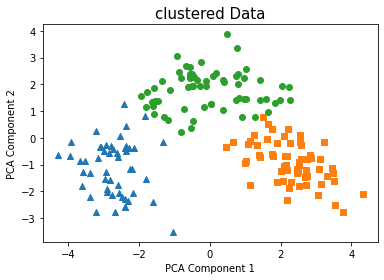

In [10]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('clustered Data', fontsize=15)
plt.show()

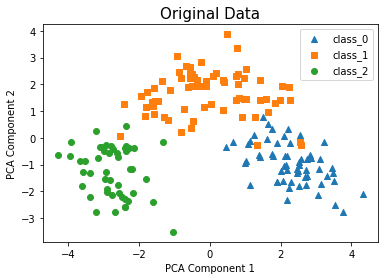

In [11]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=wine.target_names[i])
plt.legend()
plt.title('Original Data', fontsize=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

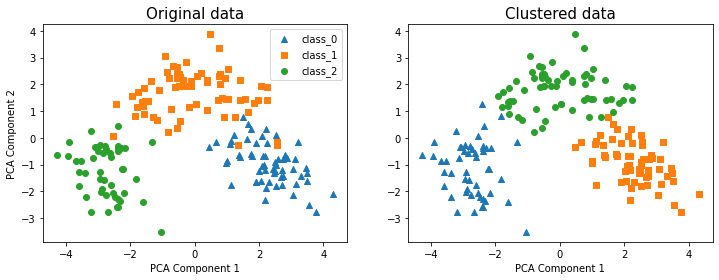

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axes[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

        if k == 0:
            ax.set_title('Original data', fontsize=15)
            ax.set_ylabel('PCA Component 2')
            ax.legend()
        else:
            ax.set_title('Clustered data', fontsize=15)
        ax.set_xlabel('PCA Component 1')
plt.show()